In [1]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation
# GPU support

In [2]:
import torch
import torch.nn as nn
import torchvision #datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import 

In [14]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (device)

cuda


In [21]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080 Ti'

In [4]:
# hyperparameters
input_size = 784 #28 x 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [5]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [6]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [7]:
#  100 samples, 1 color channel, 28 pixels by 28 pixels
# Labels is only tensor size of 100, for each class labels, we have 1 value

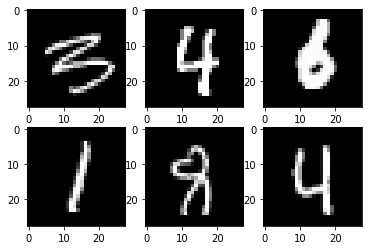

In [8]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_szie, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
#         Be careful, we don't want to apply the softmax here bc we will use cross entropy loss and it
#         will apply the softmax for us

In [18]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
# loss and optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): #enumerate func will give us the actual index and data
        # 100, 1, 28, 28... we need to reshape
        # 100, 784... this is the original shape
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        output = model(images)
        loss = criterion(output, labels)
        
        # backward
        optimizer.zero_grad() #zero out gradient to prevent accumulation
        loss.backward() #backward
        optimizer.step() #update parameter step
        
        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1} / {num_epochs}, step: {i+1}/{n_total_steps}, loss: {loss.item():.4f}')

epoch 1 / 2, step100/600, loss = 0.4898
epoch 1 / 2, step200/600, loss = 0.4184
epoch 1 / 2, step300/600, loss = 0.2863
epoch 1 / 2, step400/600, loss = 0.2072
epoch 1 / 2, step500/600, loss = 0.1688
epoch 1 / 2, step600/600, loss = 0.2065
epoch 2 / 2, step100/600, loss = 0.2529
epoch 2 / 2, step200/600, loss = 0.2090
epoch 2 / 2, step300/600, loss = 0.1727
epoch 2 / 2, step400/600, loss = 0.2185
epoch 2 / 2, step500/600, loss = 0.1794
epoch 2 / 2, step600/600, loss = 0.2200


In [23]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] #give us the the number of samples in the current batch, = 100
        n_correct += (predictions == labels).sum().item()
    acc = 100*n_correct / n_samples

In [24]:
print(f'accuracy = {acc}')

accuracy = 95.6
